In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/ai4i2020.csv")

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# Task
Perform exploratory data analysis and data cleaning on the provided dataset to prepare it for a machine learning project.

## Handle missing values

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Check for missing values in the DataFrame and sum them up to see which columns have missing data and how many.



In [ ]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


## Identify and handle outliers

### Subtask:
Detect and address outliers in the numerical features.


**Reasoning**:
Select numerical columns and create box plots to visualize outliers.



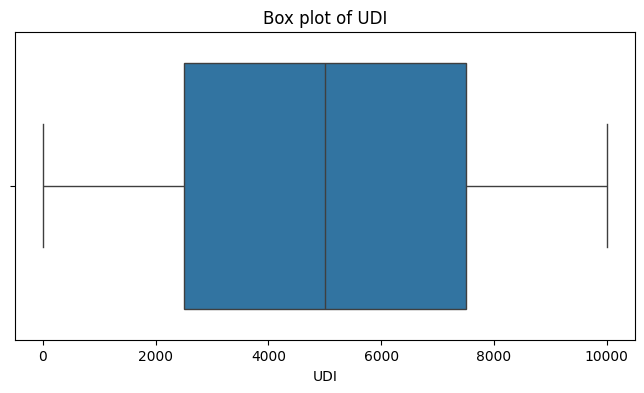

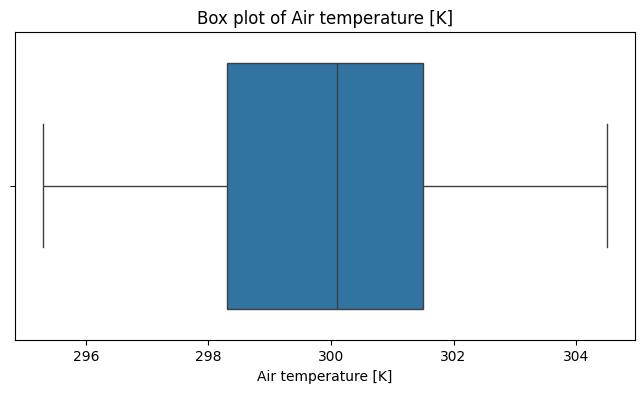

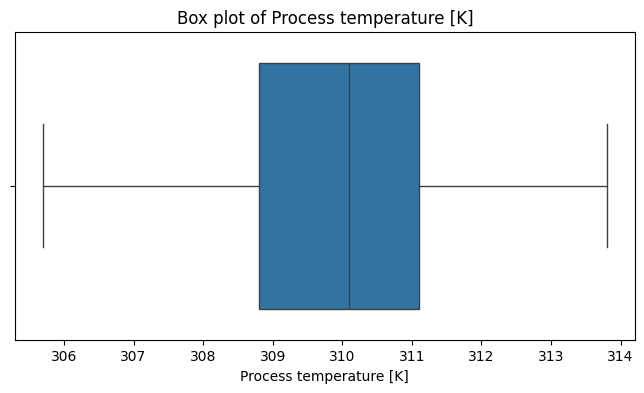

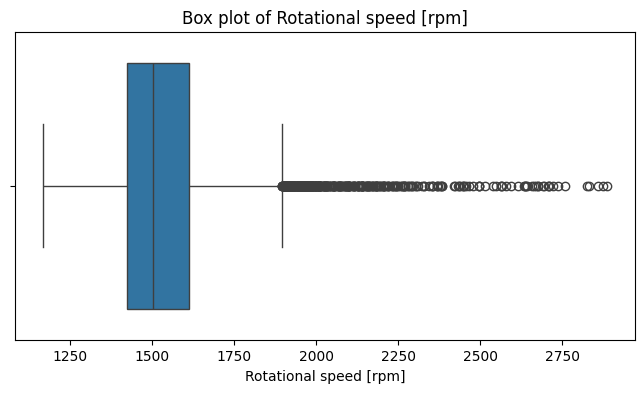

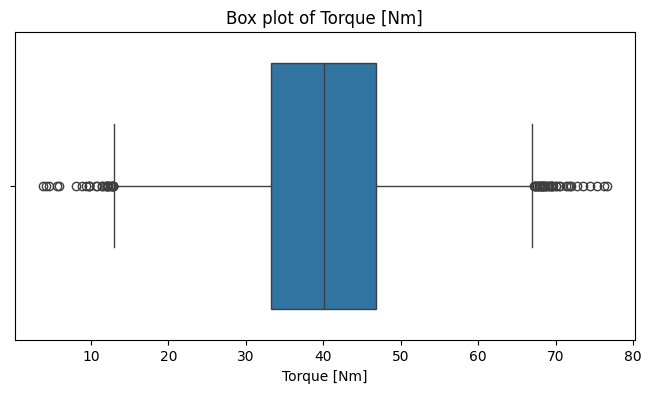

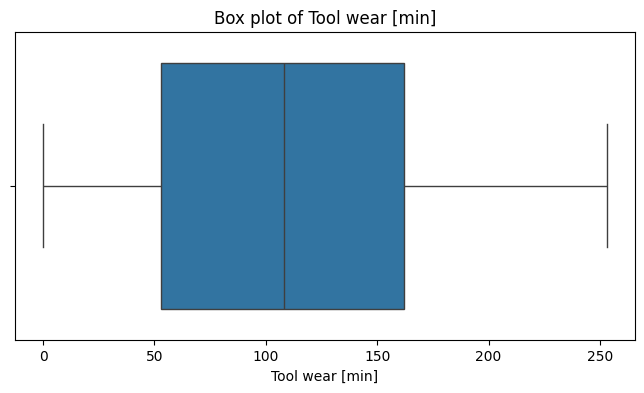

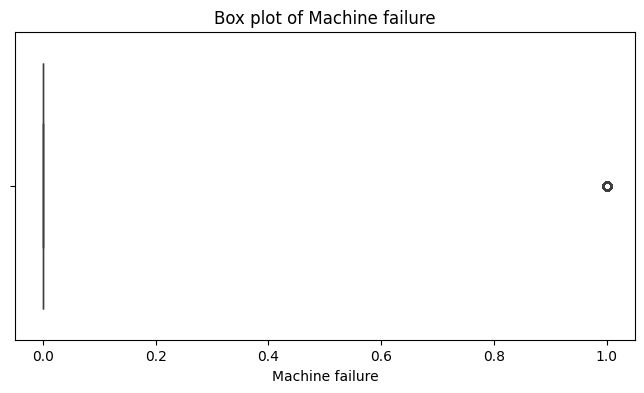

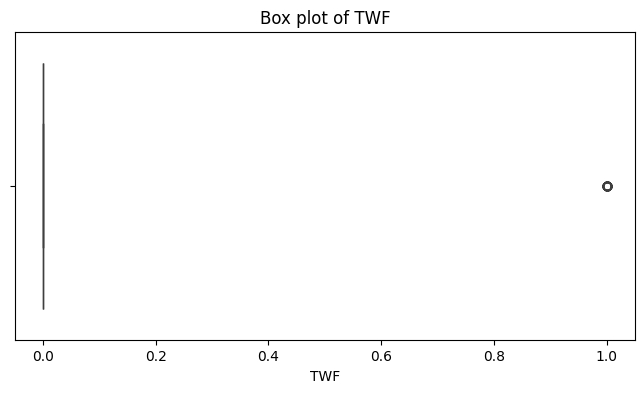

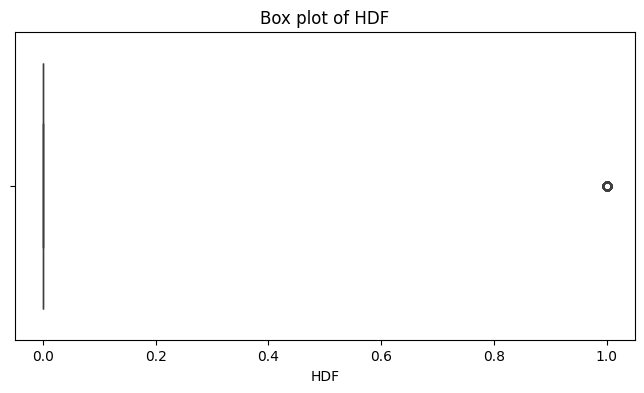

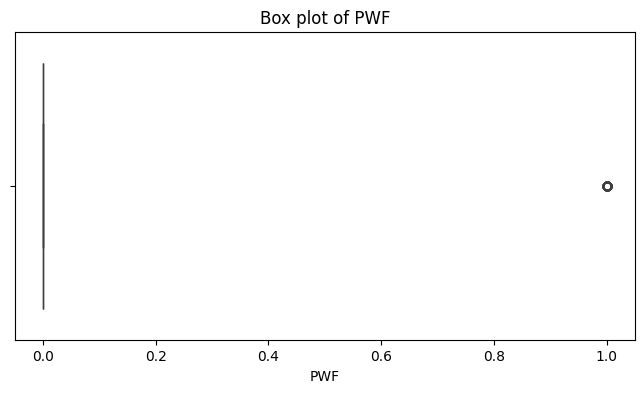

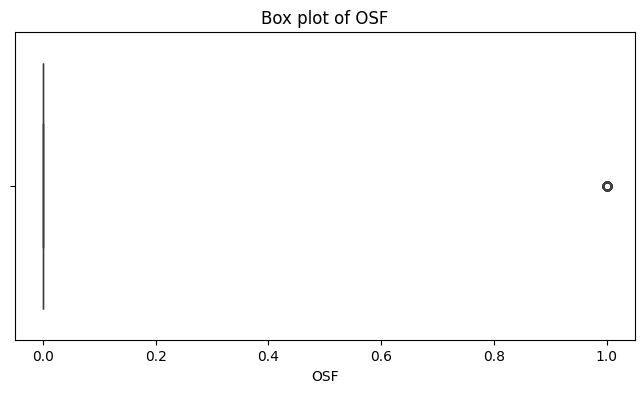

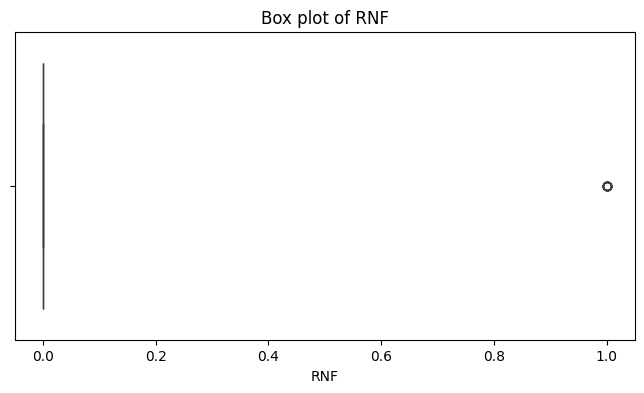

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

## Explore data distribution

### Subtask:
Visualize the distribution of numerical and categorical features.


**Reasoning**:
Visualize the distribution of numerical columns using histograms and the categorical column 'Type' using a count plot as instructed.



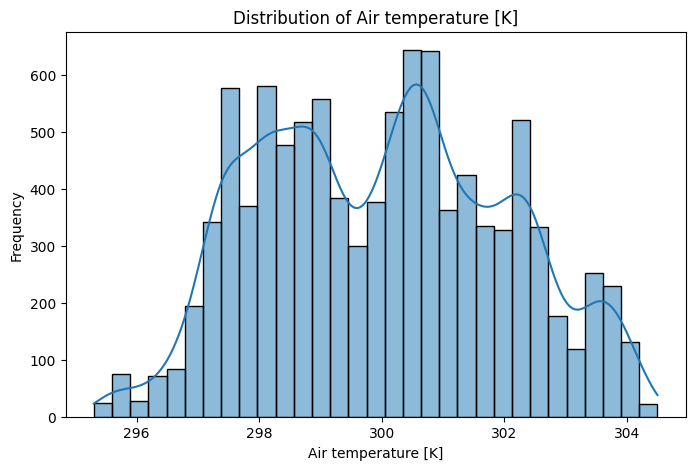

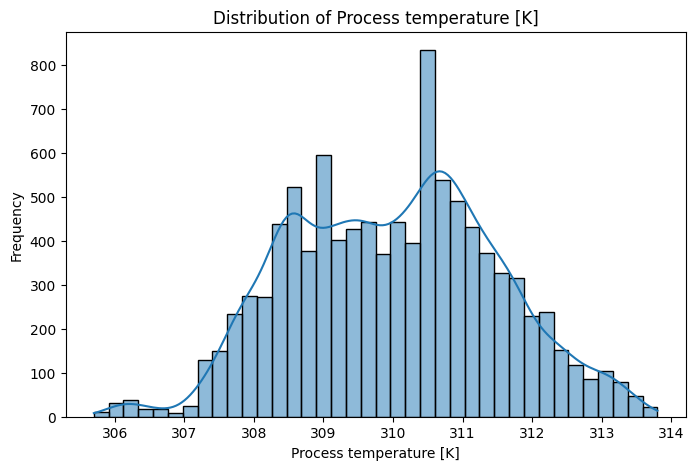

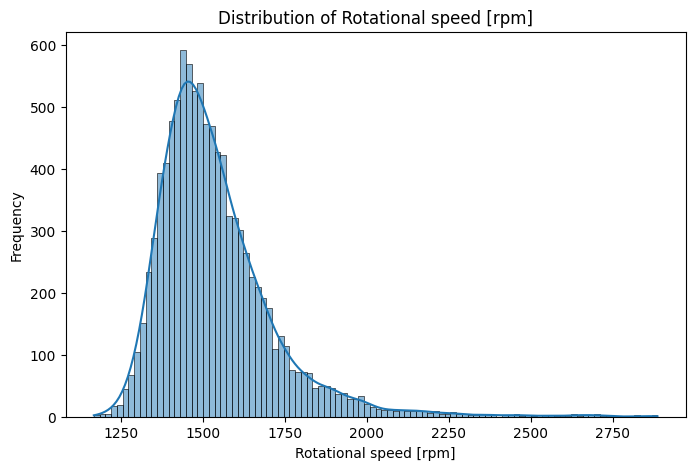

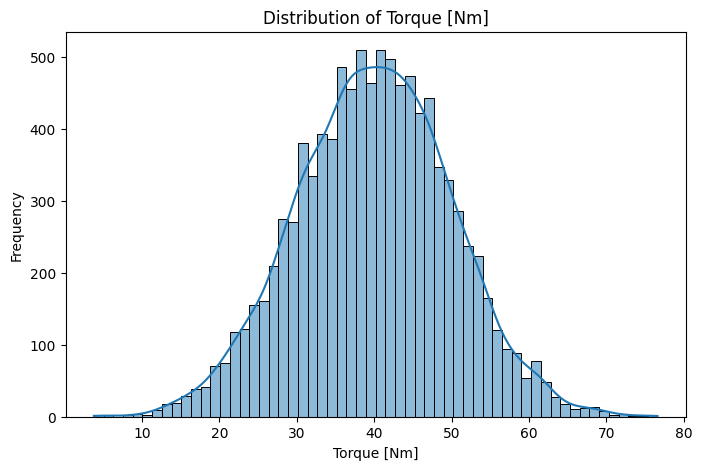

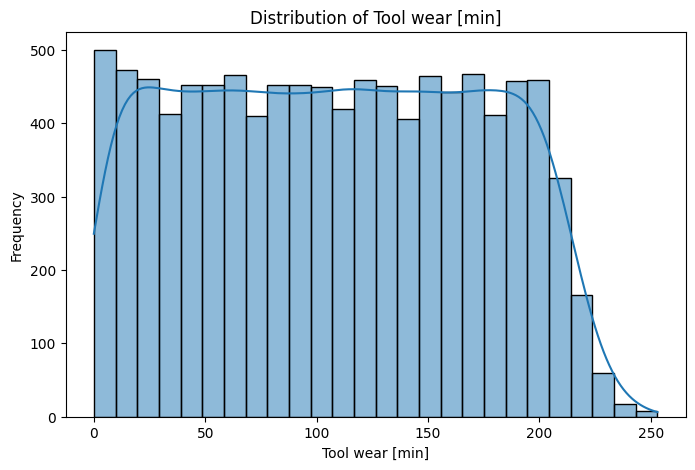

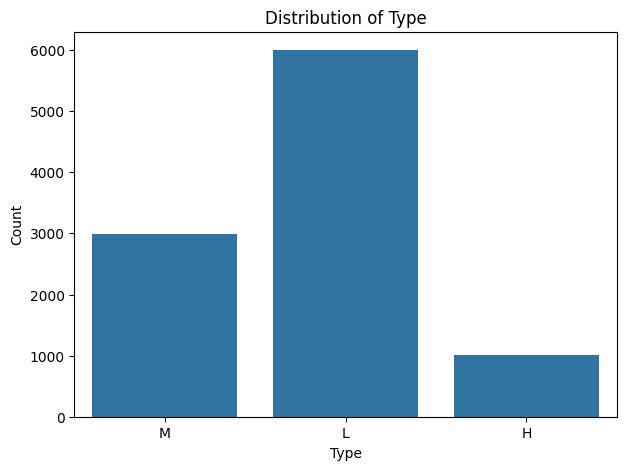

In [ ]:
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_col = 'Type'

# Plot histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot count plot for the categorical feature
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x=categorical_col)
plt.title(f'Distribution of {categorical_col}')
plt.xlabel(categorical_col)
plt.ylabel('Count')
plt.show()

## Analyze correlations

### Subtask:
Examine the correlation between different features.


**Reasoning**:
Calculate and visualize the correlation matrix for the numerical features to understand their relationships.



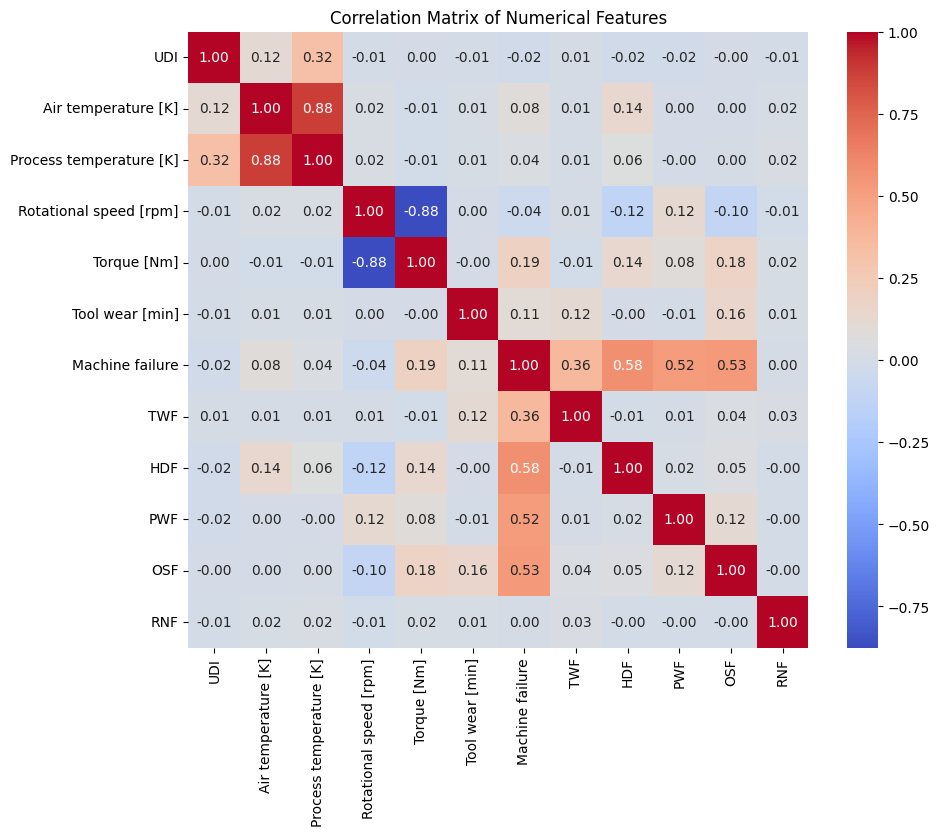

In [ ]:
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Check for duplicate rows

### Subtask:
Identify and remove duplicate rows if any.


**Reasoning**:
Check for and count duplicate rows in the DataFrame.



In [ ]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


## Feature engineering

### Subtask:
Create new features if necessary to improve the model's performance.


**Reasoning**:
Create the new features 'Temp_Difference' and 'Power' and add them to the DataFrame based on the instructions.



In [ ]:
df['Temp_Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Difference,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,56320.0


## Summary:

### Data Analysis Key Findings

*   The initial check confirmed that there are no missing values in the dataset.
*   Box plots revealed potential outliers in the 'Rotational speed \[rpm]' and 'Torque \[Nm]' columns.
*   Histograms showed the distribution of numerical features, while a count plot displayed the distribution of the 'Type' categorical feature.
*   A heatmap of the correlation matrix highlighted the linear relationships between numerical features.
*   No duplicate rows were found in the dataset.
*   Two new features, 'Temp\_Difference' (Process temperature - Air temperature) and 'Power' (Torque \* Rotational speed), were successfully engineered and added to the dataset.

### Insights or Next Steps

*   Consider strategies like capping or transformation to handle the identified outliers in 'Rotational speed \[rpm]' and 'Torque \[Nm]' if they are deemed problematic for modeling.
*   Utilize the newly engineered 'Temp\_Difference' and 'Power' features in the machine learning model, as they may provide valuable information for predicting machine failure.
